In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np 
import matplotlib.pyplot as plt
from itertools import cycle

In [5]:
# Load datasets
sales_train = pd.read_csv('sales_train_evaluation.csv')
sales_val = pd.read_csv('sales_train_validation.csv')
calendar = pd.read_csv('calendar.csv')
sell_prices = pd.read_csv('sell_prices.csv')

In [113]:
# Preview datasets
sales_train

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,...,2,2,0,0,0,2,0,0,1,1,1,0,0,1,0,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,...,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,...,1,0,2,1,1,0,0,1,0,0,1,0,3,3,1,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,1,0,2,1,1,2,0,2,1,1,0,2,1,1,1,1,4,6,0,1,1,1,0


In [115]:
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [117]:
sell_prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [119]:
# Check for missing values
sales_train.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1937      0
d_1938      0
d_1939      0
d_1940      0
d_1941      0
Length: 1947, dtype: int64

In [123]:
calendar.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [125]:
sell_prices.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [127]:
sales_train.describe()

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,...,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,0.756674,0.775927,0.779141,0.867334,1.142440,1.193178,0.715120,0.789439,0.703280,0.666382,0.777993,1.039324,0.960413,0.786028,0.672384,...,1.139128,1.406888,1.653952,1.739324,1.416235,1.453395,1.298819,1.336930,1.436701,1.778911,1.495867,1.521810,1.291538,1.385635,1.328403,1.445490,1.781174,1.965267,1.389374,1.271794,1.216661,1.212299,1.395605,1.689669,1.782158
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,3.665969,3.697822,3.486595,3.484608,4.636395,4.662770,2.993414,3.296922,2.811648,2.611911,2.985123,3.923110,3.597620,3.084773,2.874189,...,2.884903,3.601825,4.078230,4.012232,3.448094,3.629592,3.312139,3.370512,3.862338,4.529591,3.949142,3.854184,3.189395,3.557375,3.316416,3.656824,4.426550,4.706284,3.313292,3.126178,3.000348,2.955910,3.514318,4.089208,4.284356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,279.000000,258.000000,163.000000,107.000000,133.000000,149.000000,122.000000,111.000000,83.000000,95.000000,100.000000,132.000000,120.000000,113.000000,158.000000,...,99.000000,196.

In [129]:
calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [131]:
sell_prices.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


In [133]:
# Number of Stores
num_stores = sales_train['store_id'].nunique()
print(f"Number of stores: {num_stores}")

Number of stores: 10


In [135]:
# Total Number of Products
total_products = sales_train['item_id'].nunique()
print(f"Total number of products: {total_products}")

Total number of products: 3049


In [137]:
# Total Unique Products
unique_products = total_products  # Same as total_products
print(f"Total unique products: {unique_products}")

Total unique products: 3049


In [141]:
# Total and Unique Products by Category
# Filter products by department
food_products = product_info[product_info['cat_id'] == 'FOODS']
#print('food_products',food_products)
household_products = product_info[product_info['cat_id'] == 'HOUSEHOLD']
#print('household_products',household_products)
hobbies_products = product_info[product_info['cat_id'] == 'HOBBIES']
#print('household_products',household_products)

In [143]:
# Total and unique counts for each category
total_food_products = sales_train[sales_train['item_id'].isin(food_products['item_id'])]['item_id'].count()
unique_food_products = food_products['item_id'].nunique()
print(f"Total food products: {total_food_products}, Unique food products: {unique_food_products}")

Total food products: 14370, Unique food products: 1437


In [145]:
total_household_products = sales_train[sales_train['item_id'].isin(household_products['item_id'])]['item_id'].count()
unique_household_products = household_products['item_id'].nunique()
print(f"Total household products: {total_household_products}, Unique household products: {unique_household_products}")

Total household products: 10470, Unique household products: 1047


In [147]:
total_hobbies_products = sales_train[sales_train['item_id'].isin(hobbies_products['item_id'])]['item_id'].count()
unique_hobbies_products = hobbies_products['item_id'].nunique()
print(f"Total hobbies products: {total_hobbies_products}, Unique hobbies products: {unique_hobbies_products}")

Total hobbies products: 5650, Unique hobbies products: 565


In [149]:
# Top Selling Product
# Summing sales across all days for each product
total_sales_by_product = sales_train.iloc[:, 6:].sum(axis=1)
top_selling_product = sales_train.loc[total_sales_by_product.idxmax(), 'item_id']
print(f"Top selling product: {top_selling_product}")

Top selling product: FOODS_3_090


In [151]:
# Top Selling Store
total_sales_by_store = sales_train.iloc[:, 6:].groupby(sales_train['store_id']).sum().sum(axis=1)
top_selling_store = total_sales_by_store.idxmax()
print(f"Top selling store: {top_selling_store}")

Top selling store: CA_3


<Axes: title={'center': 'Sales Trend for FOODS_3_090'}>

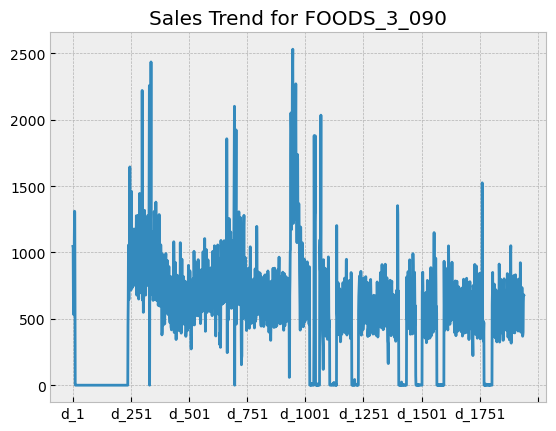

In [153]:
# Sales Trends Over Time for the Top Product
top_product_sales = sales_train[sales_train['item_id'] == top_selling_product].iloc[:, 6:].sum()
top_product_sales.plot(title=f"Sales Trend for {top_selling_product}")

<Axes: title={'center': 'Sales Trend for CA_3'}>

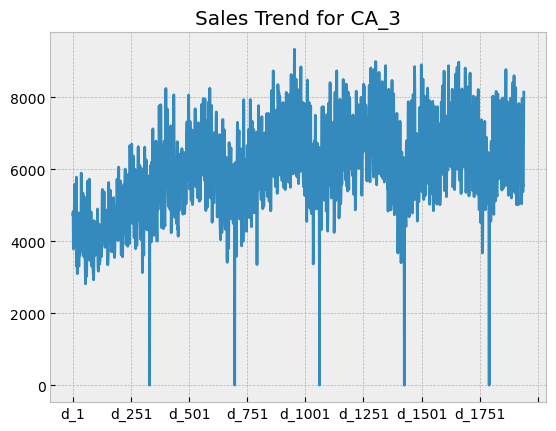

In [155]:
# Sales Trends Over Time for the Top Store
top_store_sales = sales_train[sales_train['store_id'] == top_selling_store].iloc[:, 6:].sum()
top_store_sales.plot(title=f"Sales Trend for {top_selling_store}")

In [159]:
sales_melted = sales_train.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                                var_name='day', value_name='sales')
sales_melted

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
...,...,...,...,...,...,...,...,...
59181085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1941,1
59181086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1941,0
59181087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1941,2
59181088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1941,0


In [161]:
sales_with_dates = pd.merge(sales_melted, calendar, left_on='day', right_on='d')
sales_with_dates

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59181085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1941,1,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0
59181086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0
59181087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1941,2,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0
59181088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0


In [163]:
sales_with_dates['date'] = pd.to_datetime(sales_with_dates['date'])
sales_with_dates

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59181085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1941,1,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0
59181086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0
59181087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1941,2,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0
59181088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,d_1941,NaN,NaN,NaN,NaN,0,0,0


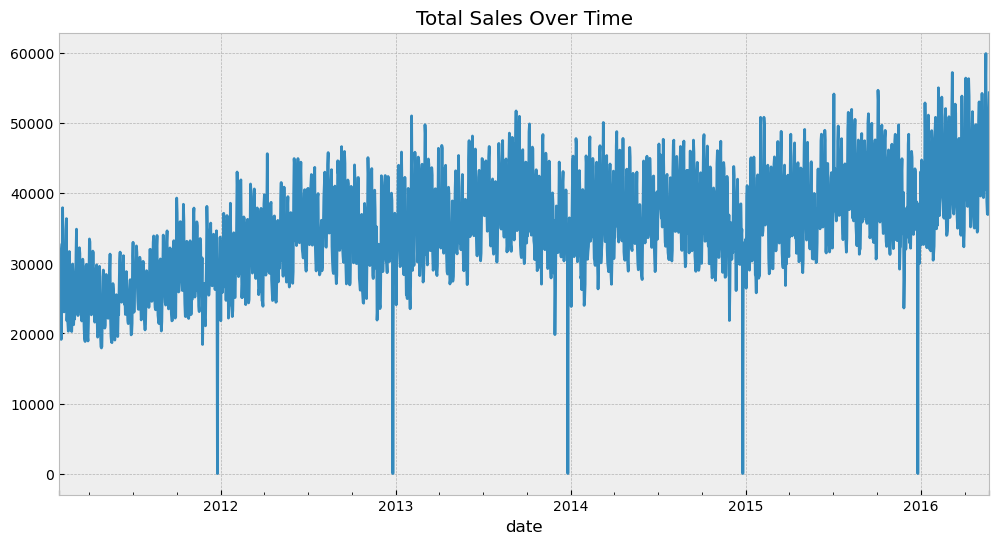

In [165]:
plt.figure(figsize=(12,6))
sales_with_dates.groupby('date')['sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.show()

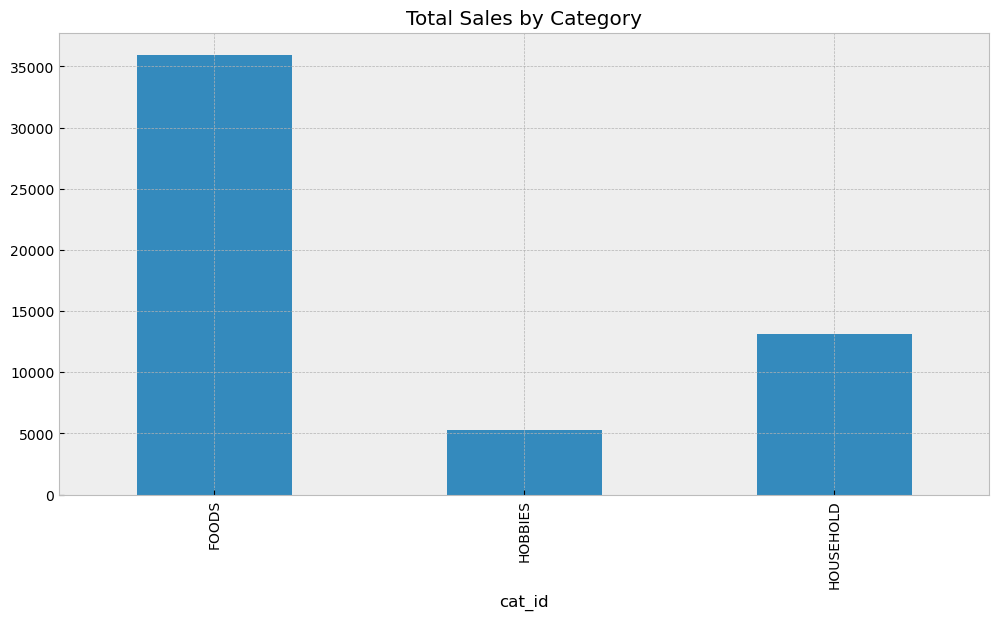

In [167]:
# Sales by category
plt.figure(figsize=(12,6))
sales_by_category = sales_train.groupby('cat_id').sum().iloc[:, -1]
sales_by_category.plot(kind='bar')
plt.title('Total Sales by Category')
plt.show()

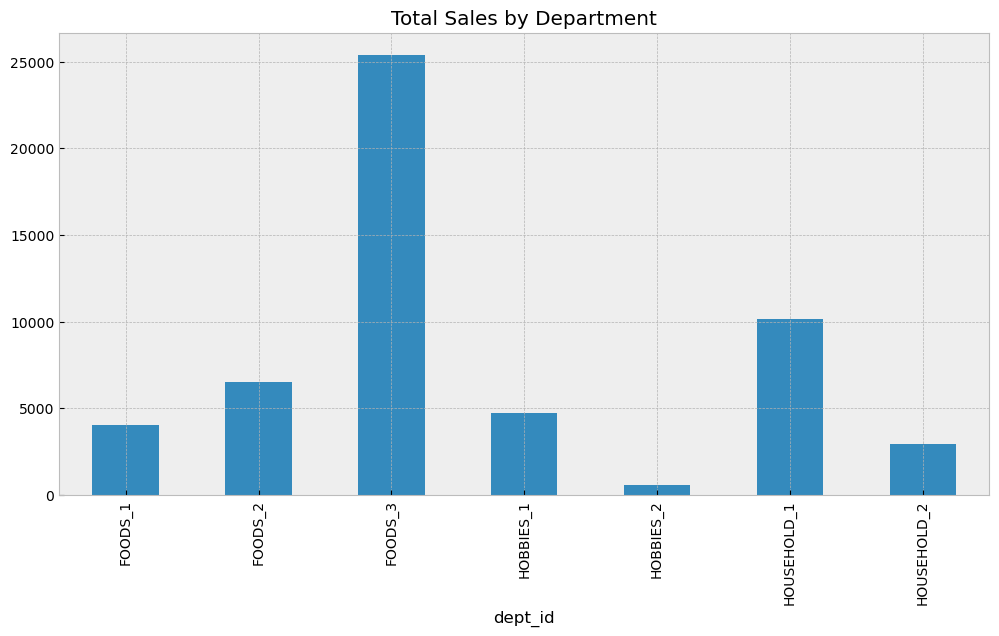

In [169]:
# Sales by department
plt.figure(figsize=(12,6))
sales_by_department = sales_train.groupby('dept_id').sum().iloc[:, -1]
sales_by_department.plot(kind='bar')
plt.title('Total Sales by Department')
plt.show()

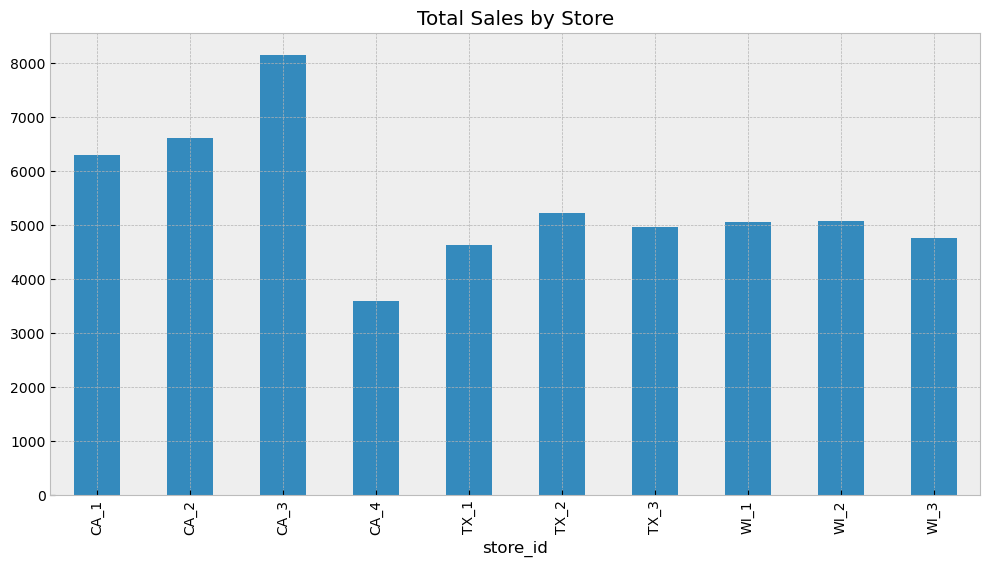

In [171]:
# Sales by store
plt.figure(figsize=(12,6))
sales_by_store = sales_train.groupby('store_id').sum().iloc[:, -1]
sales_by_store.plot(kind='bar')
plt.title('Total Sales by Store')
plt.show()

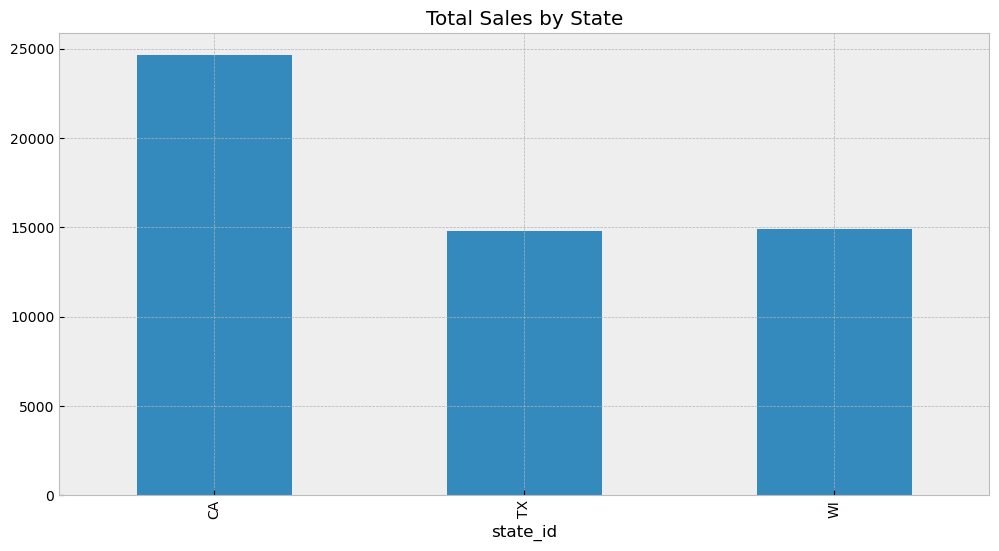

In [173]:
# Sales by state
plt.figure(figsize=(12,6))
sales_by_state = sales_train.groupby('state_id').sum().iloc[:, -1]
sales_by_state.plot(kind='bar')
plt.title('Total Sales by State')
plt.show()

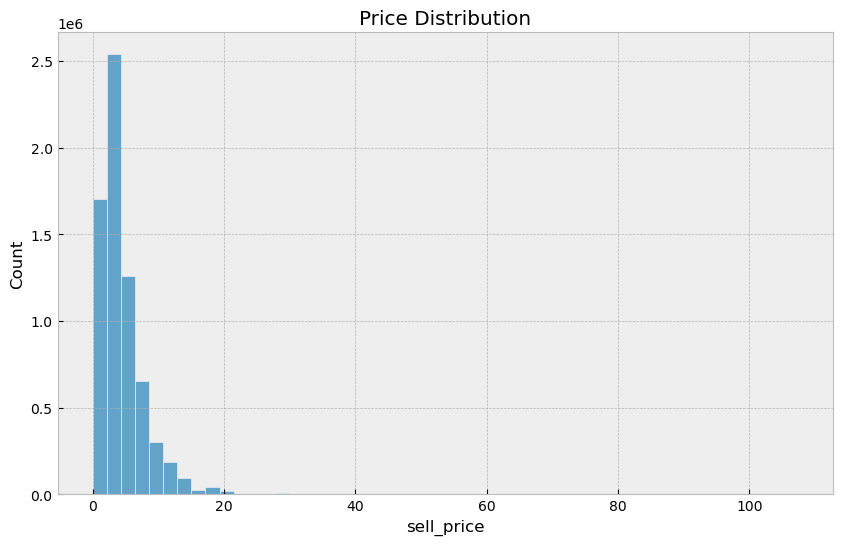

In [175]:
# Price distribution
plt.figure(figsize=(10,6))
sns.histplot(sell_prices['sell_price'], bins=50)
plt.title('Price Distribution')
plt.show()

In [27]:
# Feature Engineering: Rolling Average and Lag Features
sales_train['rolling_avg'] = sales_train.iloc[:, -7:].mean(axis=1)
sales_train

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,rolling_avg
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,4,0,0,0,0,3,3,0,1,1.000000
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,2,1,1,0,0,0,0,0,0.285714
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,2,0,0,0,2,3,0,1,0.857143
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,4,0,1,3,0,2,6,2.285714
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,2,1,0,0,2,1,0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,0,3,0,1,1,0,0,1,1,0.571429
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0.285714
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,1,2,0,1,0,1,0,2,0.857143
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,4,6,0,1,1,1,0,1.857143


In [28]:
sales_train['lag_1'] = sales_train.iloc[:, -2]
sales_train

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,rolling_avg,lag_1
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,3,3,0,1,1.000000,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,0,0,0,0,0.285714,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,0,0,2,3,0,1,0.857143,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,4,0,1,3,0,2,6,2.285714,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,2,1,0,0,2,1,0,0.857143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,3,0,1,1,0,0,1,1,0.571429,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,1,0,1,0,0.285714,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,1,2,0,1,0,1,0,2,0.857143,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,4,6,0,1,1,1,0,1.857143,0


In [30]:
# Outlier Detection using Z-scores
sales_train['zscore'] = zscore(sales_train.iloc[:, -1])
outliers = sales_train[sales_train['zscore'].abs() > 3]
print("Number of outliers detected: ", outliers.shape[0])

Number of outliers detected:  470


In [9]:
pd.set_option('display.max_columns', 50)  # Fix the option name here
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [11]:
# Read the data
cal_data=pd.read_csv('calendar.csv')
salestv_data=pd.read_csv('sales_train_validation.csv')
#ss_data=pd.read_csv('sample_submission.csv')
sellp_data=pd.read_csv('sell_prices.csv')

In [21]:
def list_to_df(list_obj):
    return pd.Series(list_obj)

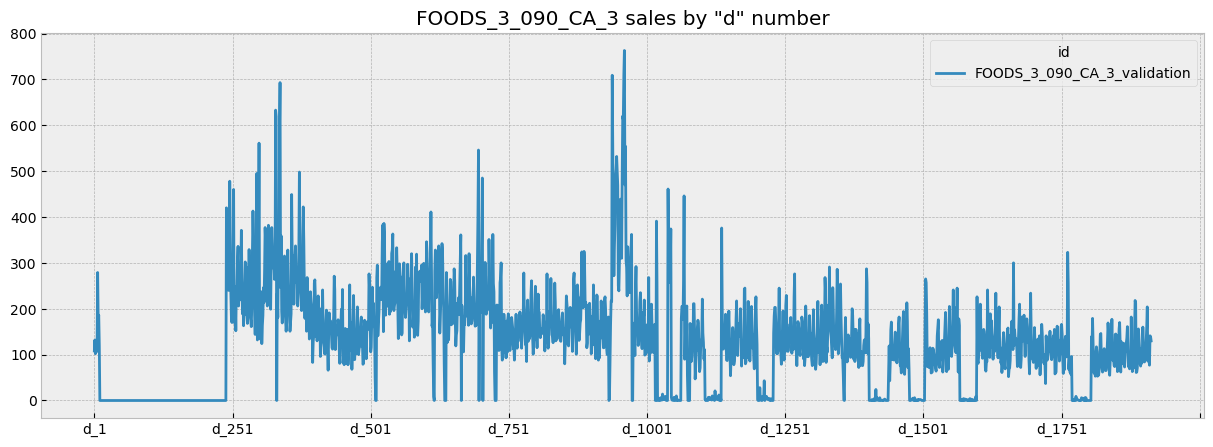

In [23]:
d_cols=[c for c in salestv_data.columns if 'd_' in c]

# Below we are the chaining the following operations
# 1. Select a particular item
# 2. Set id as index, & keep only sales data column starting with d_
# 3. Transform so that dataframe is a column
# 4. Plot the data
salestv_data.loc[salestv_data['id']=='FOODS_3_090_CA_3_validation'] \
.set_index('id')[d_cols] \
.T \
.plot(figsize=(15,5), title='FOODS_3_090_CA_3 sales by "d" number',color=next(color_cycle))
plt.show()

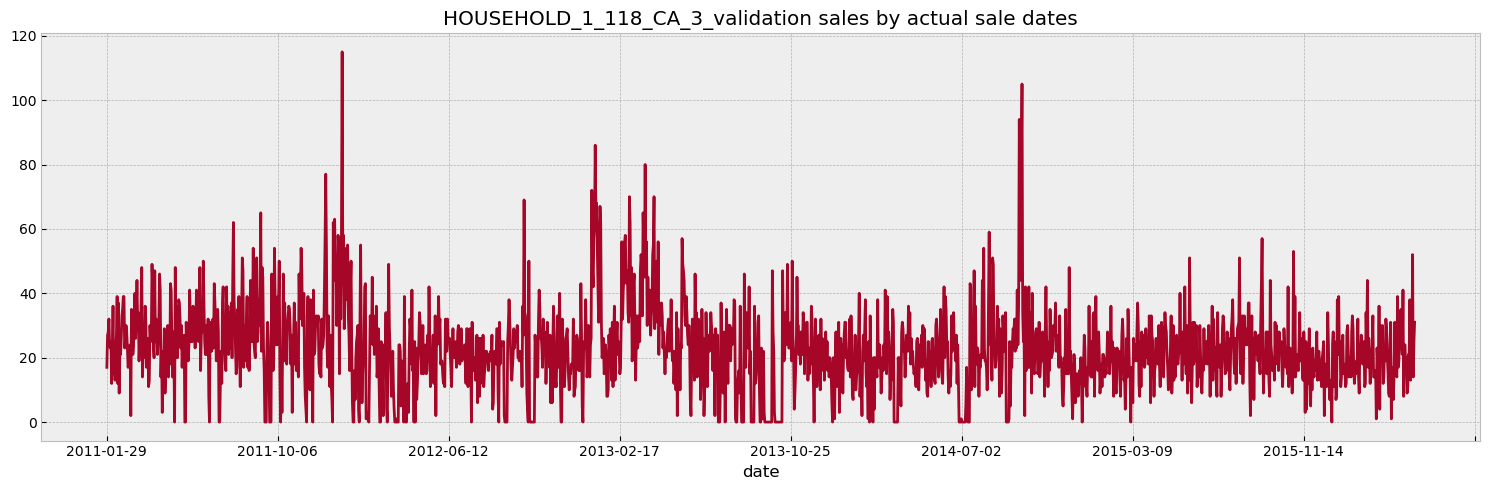

In [25]:
ids = ['FOODS_3_090_CA_3_validation', 'HOBBIES_1_234_CA_3_validation', 'HOUSEHOLD_1_118_CA_3_validation', 'HOBBIES_1_001_CA_1_validation']
examples = []

# General function to extract specific item Id values from sales_train_evaluation dataset
for i in range(len(ids)):
    # Merge calendar date with sales_train_evaluation date
    examples.append(salestv_data.loc[salestv_data['id']== ids[i]][d_cols].T) # Fetch a specific Id and transform it as column
    examples[i] = examples[i].rename(columns={examples[i].columns.values[0] : ids[i]}) # Rename column e.g 8412 (location Id) to the proper name
    examples[i] = examples[i].reset_index().rename(columns={'index':'d'}) # Reset index so, d_cols are not index and then, rename index as d
    examples[i] = examples[i].merge(cal_data) # Merge two dataframe on the bases of column named d


graph_ids = [2]
fig, axs = plt.subplots(len(graph_ids),1,figsize=(15,10)) 
if len(graph_ids) != 1 : axs=axs.flatten() 

ax_id=0
for graph_id in graph_ids:
    # Set date as the index of dataframe to be plotted properly and only fetch specific Id sales value
    examples[graph_id].set_index('date')[ids[graph_id]] \
    .plot(figsize=(15,5), color=next(color_cycle), title= f'{ids[graph_id]} sales by actual sale dates', ax=axs[ax_id] if len(graph_ids)!=1 else axs)
    
    ax_id+=1
plt.tight_layout()
plt.show()

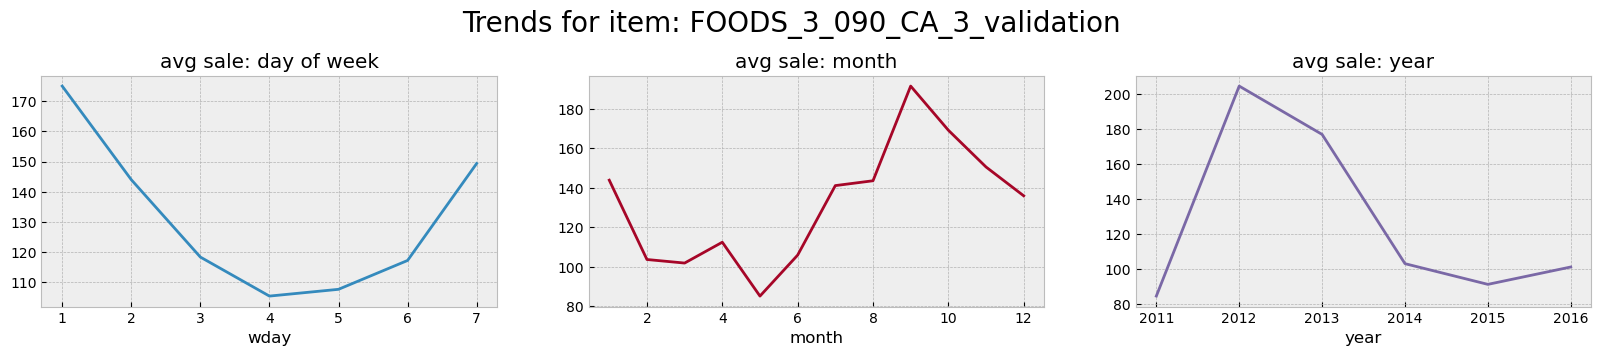

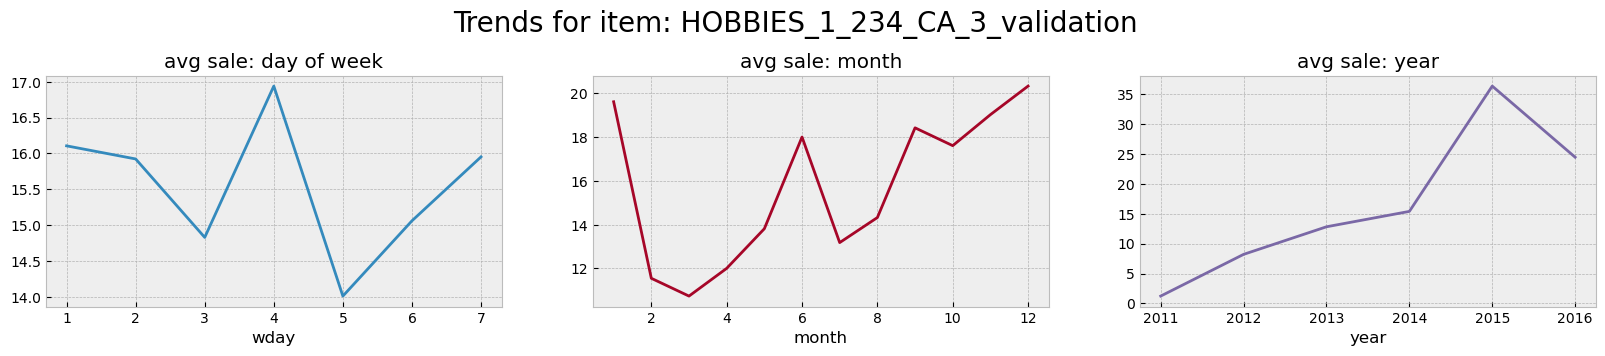

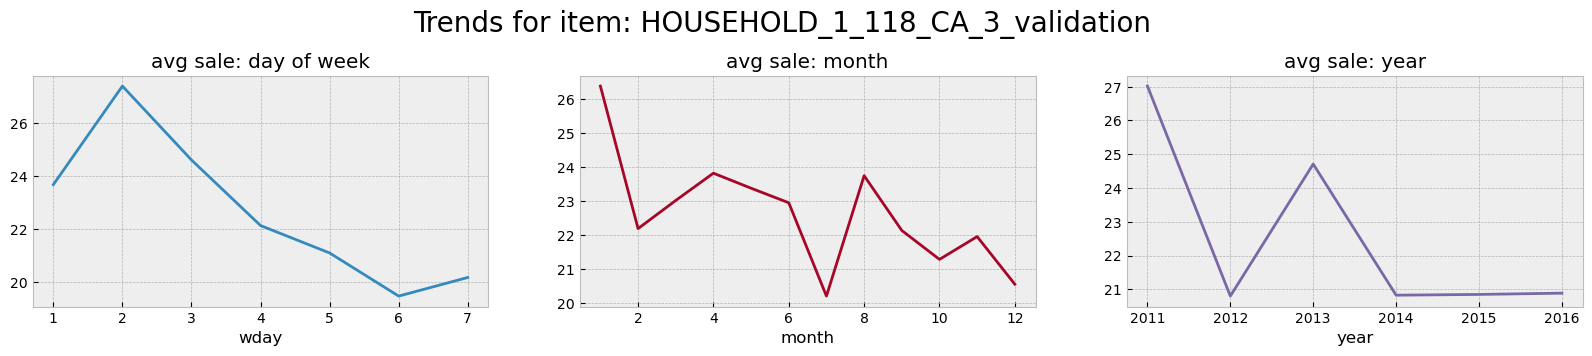

In [47]:
for i in [0, 1, 2]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 3))

    # Select only numeric columns
    numeric_df = examples[i].select_dtypes(include=[np.number])

    numeric_df.groupby('wday').mean()[ids[i]].plot(kind='line', title='avg sale: day of week', color=color_pal[0], ax=ax1)
    
    numeric_df.groupby('month').mean()[ids[i]].plot(kind='line', title='avg sale: month', color=color_pal[1], ax=ax2)
    
    numeric_df.groupby('year').mean()[ids[i]].plot(kind='line', title='avg sale: year', color=color_pal[2], ax=ax3)
    
    fig.suptitle(f'Trends for item: {ids[i]}', size=20, y=1.1)


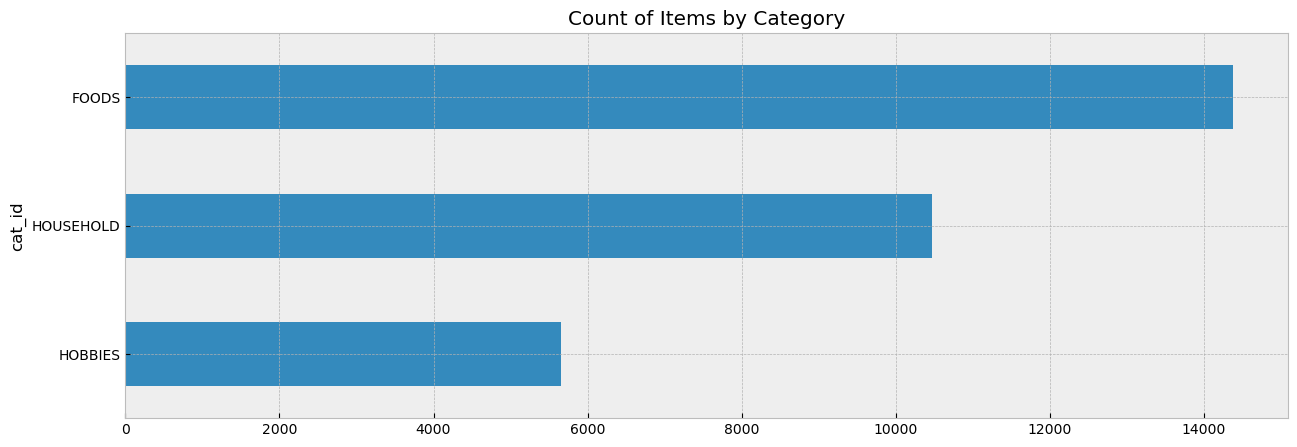

In [51]:
# Plot of count of Items by category
salestv_data.groupby('cat_id').count()['id'].sort_values().plot(kind='barh', title='Count of Items by Category', figsize=(15,5))
plt.show()

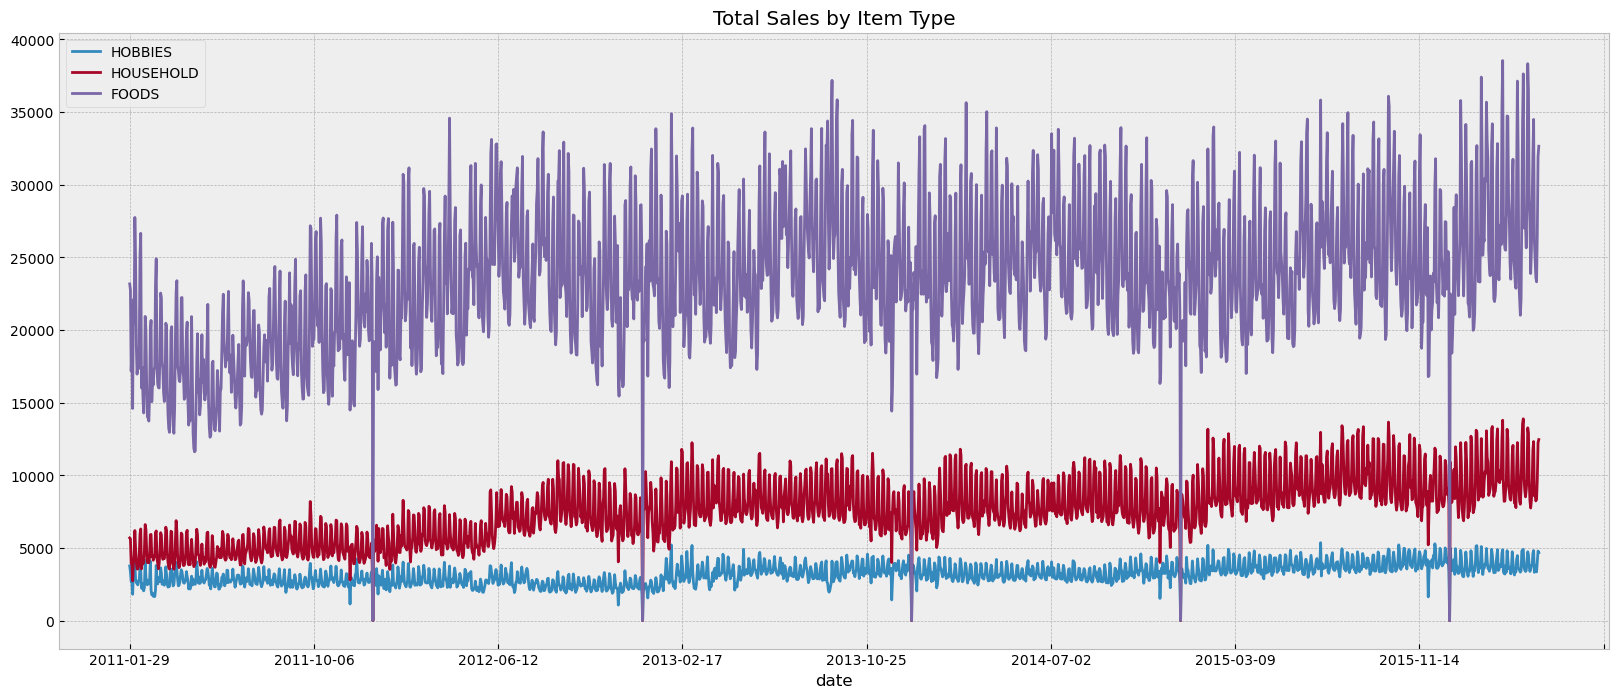

In [53]:
past_sales_item = salestv_data.set_index('id')[d_cols].T \
.merge(cal_data.set_index('d')['date'], left_index=True, right_index=True).set_index('date')

for i in salestv_data['cat_id'].unique():
    items_col = [c for c in past_sales_item.columns if i in c]
    past_sales_item[items_col].sum(axis=1).plot(figsize=(20,8), title='Total Sales by Item Type')

plt.legend(salestv_data['cat_id'].unique())
plt.show()

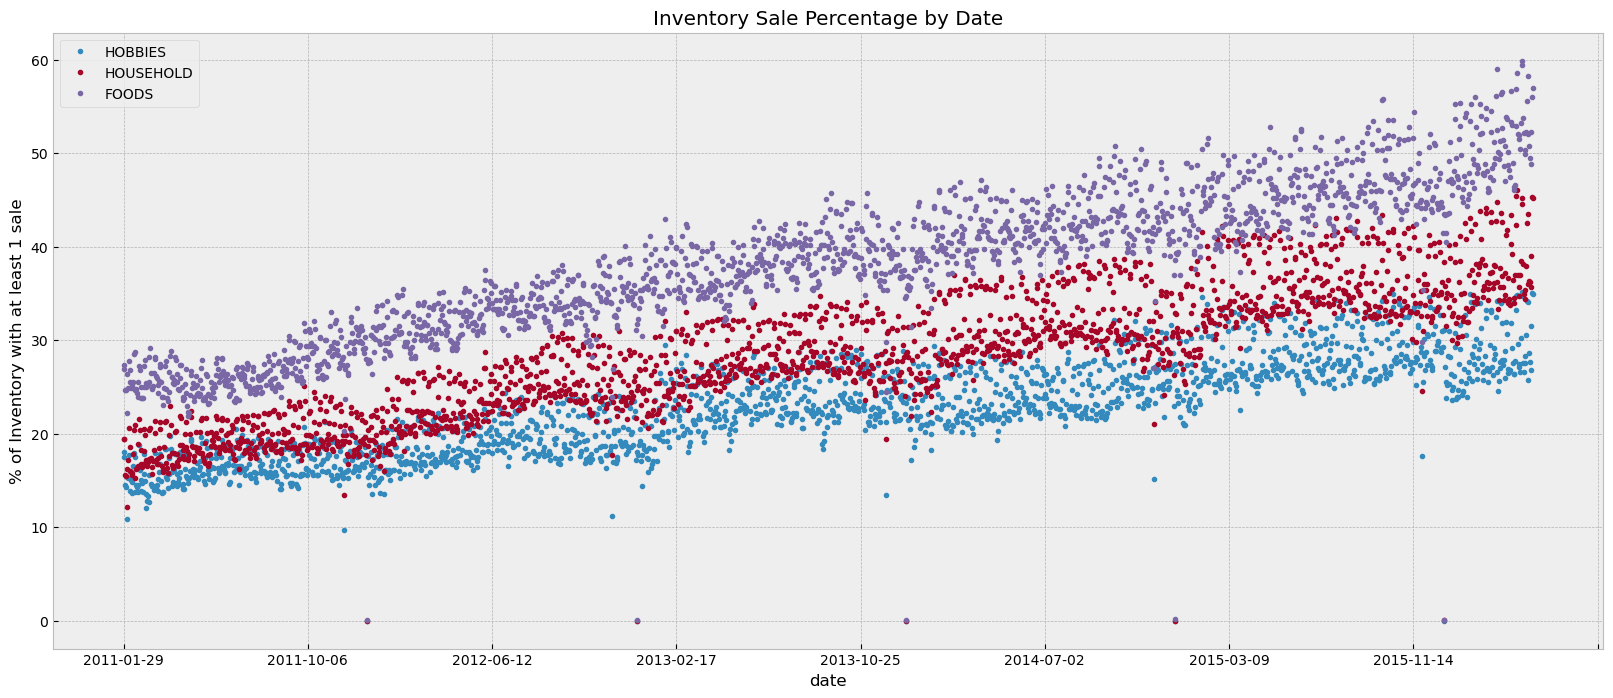

In [55]:
past_sales_clipped = past_sales_item.clip(0,1) # Give the value of 0 or 1 to rows with no value or some value respectively, trim values to input thresholds

for i in salestv_data['cat_id'].unique():
    items_col = [c for c in past_sales_clipped.columns if i in c]
    (past_sales_clipped[items_col].mean(axis=1)*100).plot(figsize=(20,8), style='.', title='Inventory Sale Percentage by Date')
plt.ylabel('% of Inventory with at least 1 sale')
plt.legend(salestv_data['cat_id'].unique())
plt.show()

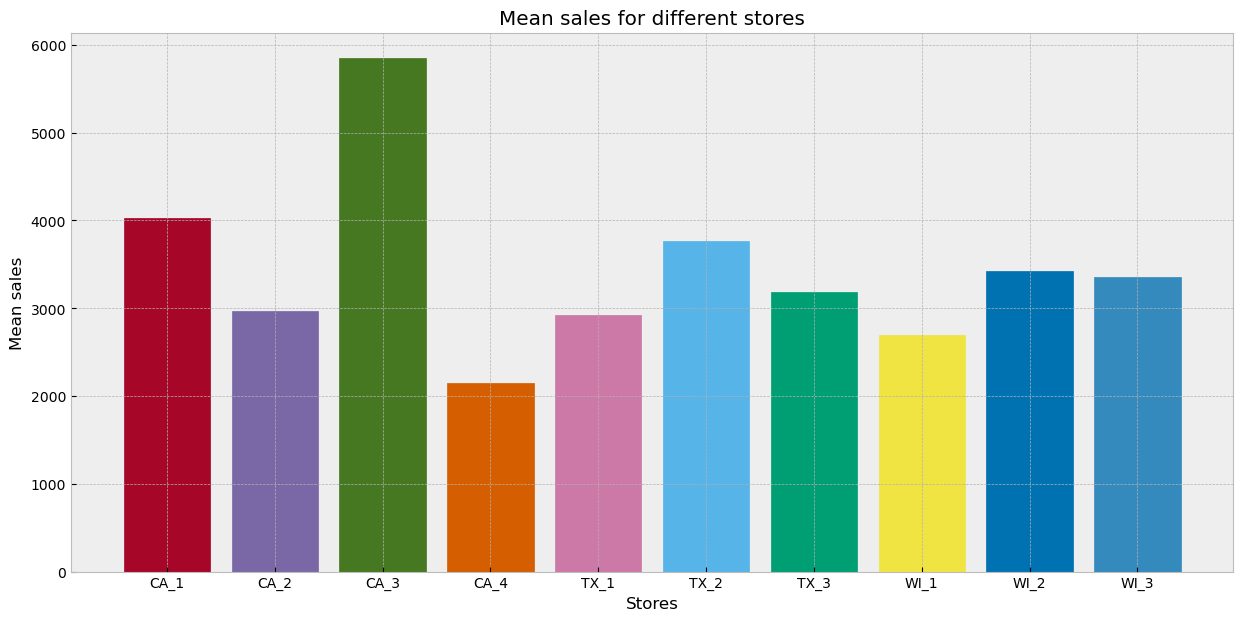

In [63]:
mean_value_store = []
for s in store_list:
    store_items = [c for c in past_sales_item if s in c]
    mean_value_store.append(np.mean(past_sales_item[store_items].sum(axis=1)))

plt.figure(figsize=(15,7))
bplot = plt.bar(store_list,mean_value_store)

#fill different colors for bar plot
colors = [next(color_cycle) for i in range(0,len(store_list))]
for i, b in enumerate(bplot):
    b.set_color(colors[i])
    
plt.xlabel('Stores')
plt.ylabel('Mean sales')
plt.title('Mean sales for different stores')
plt.show()